In [1]:
# We need to update to python 3.11 for ydata_profiling to work.
!python --version
!sudo apt-get update -y
!sudo apt-get install python3.11

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 2

#check python version
!python --version

# install pip
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python3 get-pip.py --force-reinstall

#install colab's dependencies
!python3 -m pip install ipython ipython_genutils ipykernel jupyter_console prompt_toolkit httplib2 astor

# link to the old google package
!ln -s /usr/local/lib/python3.10/dist-packages/google \
       /usr/local/lib/python3.11/dist-packages/google

# There has got to be a better way to do this...but there's a bad import in some of the colab files
# IPython no longer exposes traitlets like this, it's a separate package now
!sed -i "s/from IPython.utils import traitlets as _traitlets/import traitlets as _traitlets/" /usr/local/lib/python3.11/dist-packages/google/colab/*.py
!sed -i "s/from IPython.utils import traitlets/import traitlets/" /usr/local/lib/python3.11/dist-packages/google/colab/*.py


Python 3.11.7
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.11 is already the newest version (3.11.7-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [2]:
#check python version
import sys
print(sys.version)
!python3 --version
!python --version

3.11.7 (main, Dec  8 2023, 18:56:58) [GCC 11.4.0]
Python 3.11.7
Python 3.11.7


In [3]:
%pip install ydata-profiling

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

How many observations are there in the sample? Discuss the structure of the dataset: how many quantitative and how many qualitative variables do we have? Are there any missing data? (0.5point) • Provide and describe appropriate frequency tables or descriptive statistics for the variables (take into account the type of the variables!) (0.5point). • Present and discuss (where appropriate) variables’ distributions, especially compare them with the normal distribution (e.g. with histograms, density functions, qqplots...). (2points)

In [5]:
# Subtask 1

data = pd.read_csv("earnings.csv", delimiter=';')
print(data.head())
data.describe()

       id      base   bonus  overtime_pay    other  sector  section_07  sex  \
0  192064  26651.53     0.0          0.00     0.00       1           3    2   
1   25495  40168.50  1500.0          0.00  3414.32       1           2    1   
2  142164  20134.80     0.0          0.00  1700.41       1           2    2   
3  198034  16475.00     0.0          0.00  1305.00       1           2    2   
4  144990  34797.60     0.0       1893.35  3118.73       1           2    2   

   education  contract  age  duration_total  duration_entity  \
0          4         1   49           33.03             7.06   
1          1         1   36           10.07             6.01   
2          4         1   52           28.08            19.05   
3          5         1   55           35.07            11.01   
4          2         1   50           27.00            19.01   

   duration_nominal  duration_overtime  
0           1524.15                0.0  
1           1562.40                0.0  
2           1816.

,id,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.00000,11000.000000,11000.000000,11000.000000
mean,99813.830182,33376.738065,2128.486176,1679.273923,2477.625815,1.041091,2.030091,1.753545,2.764182,1.154000,42.470182,18.56708,11.401382,1301.307435,47.702325
std,58047.974954,19276.551638,4966.444726,5407.964344,3715.419120,0.198510,0.682476,0.430966,1.230735,0.360965,10.012140,10.99695,9.322181,540.189234,111.963867
min,8.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,0.01000,0.010000,12.800000,0.000000
25%,49618.250000,20995.115000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,34.000000,9.03000,3.070000,766.800000,0.000000
50%,99881.500000,31341.245000,620.000000,0.000000,2141.820000,1.000000,2.000000,2.000000,2.000000,1.000000,43.000000,19.03500,9.100000,1591.900000,0.000000
75%,149880.250000,41348.290000,2940.717500,1139.330000,3497.430000,1.000000,2.000000,2.000000,4.000000,1.000000,51.000000,27.11000,18.040000,1768.000000,40.000000
max,199986.000000,241624.390000,258061.000000,228110.340000,88555.760000,2.000000,3.000000,2.000000,6.000000,2.000000,77.000000,57.02000,46.010000,2024.000000,1812.580000


In [6]:
print(f"Number of observations is: {len(data)}.")
print(f"There are {len(data.columns)} variables.")
print(f"The variables are: {data.columns.values} in total.")

qual_vars = ['id', 'sector', 'section_07', 'sex', 'education', 'contract']
quant_vars = data.columns.values[~data.columns.isin(qual_vars)]
print(f"There are {len(qual_vars)} qualitative variables and {len(quant_vars)} quantitative variables.")
print(f"The qualitative variables are: {qual_vars}.")
print(f"The quantitative variables are: {quant_vars}.")
print(f"There is no null data:\n{data.isnull().sum()}.")

Number of observations is: 11000.
There are 15 variables.
The variables are: ['id' 'base' 'bonus' 'overtime_pay' 'other' 'sector' 'section_07' 'sex'
 'education' 'contract' 'age' 'duration_total' 'duration_entity'
 'duration_nominal' 'duration_overtime'] in total.
There are 6 qualitative variables and 9 quantitative variables.
The qualitative variables are: ['id', 'sector', 'section_07', 'sex', 'education', 'contract'].
The quantitative variables are: ['base' 'bonus' 'overtime_pay' 'other' 'age' 'duration_total'
 'duration_entity' 'duration_nominal' 'duration_overtime'].
There is no null data:
id                   0
base                 0
bonus                0
overtime_pay         0
other                0
sector               0
section_07           0
sex                  0
education            0
contract             0
age                  0
duration_total       0
duration_entity      0
duration_nominal     0
duration_overtime    0
dtype: int64.


In [7]:
# get frequency tables for qualitative variables
for var in qual_vars:
    print(f"Frequency table for {var}:\n{data[var].value_counts()}\n")

# get descriptive statistics for quantitative variables
for var in quant_vars:
    print(f"Descriptive statistics for {var}:\n{data[var].describe()}\n")

Frequency table for id:
id
192064    1
150038    1
172121    1
140632    1
61821     1
         ..
55373     1
121822    1
169539    1
102024    1
724       1
Name: count, Length: 11000, dtype: int64

Frequency table for sector:
sector
1    10548
2      452
Name: count, dtype: int64

Frequency table for section_07:
section_07
2    5867
3    2732
1    2401
Name: count, dtype: int64

Frequency table for sex:
sex
2    8289
1    2711
Name: count, dtype: int64

Frequency table for education:
education
2    6633
4    1983
5     906
3     680
1     430
6     368
Name: count, dtype: int64

Frequency table for contract:
contract
1    9306
2    1694
Name: count, dtype: int64

Descriptive statistics for base:
count     11000.000000
mean      33376.738065
std       19276.551638
min          10.000000
25%       20995.115000
50%       31341.245000
75%       41348.290000
max      241624.390000
Name: base, dtype: float64

Descriptive statistics for bonus:
count     11000.000000
mean       2128.486176


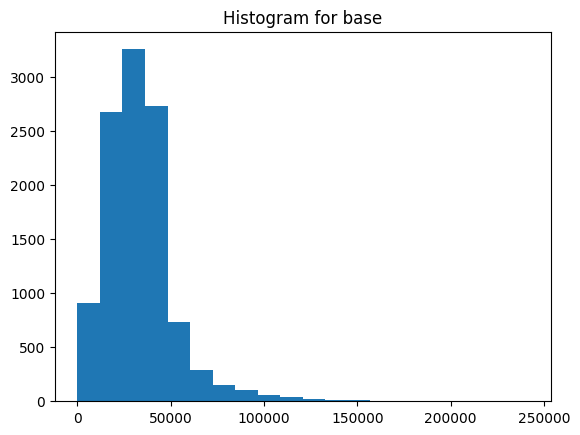

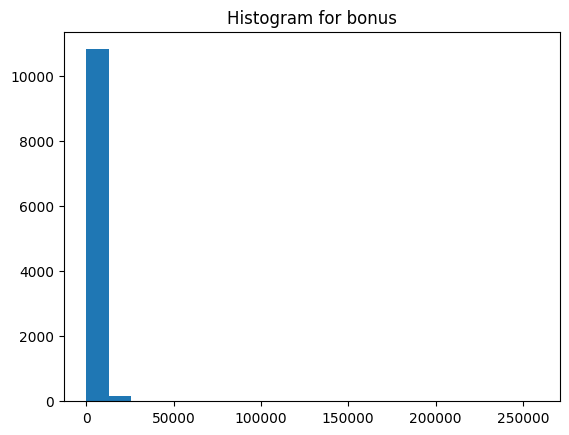

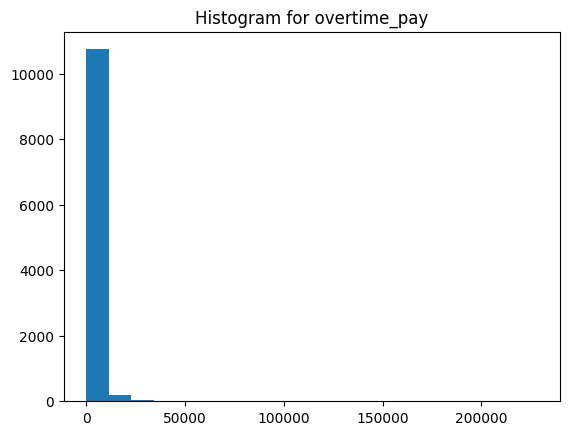

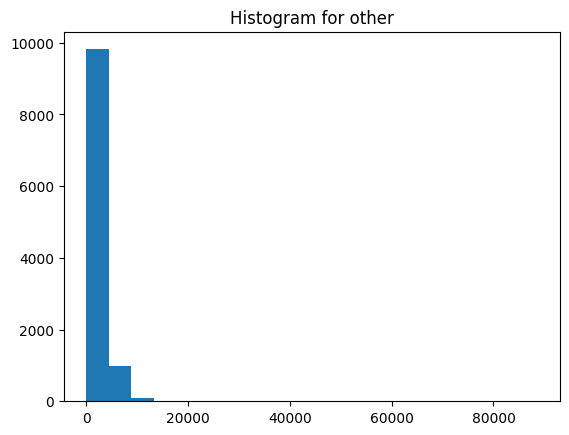

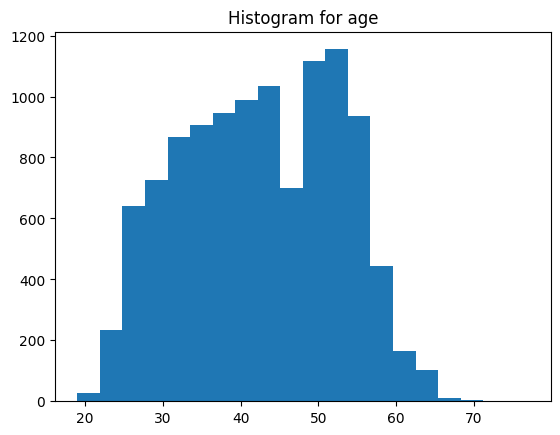

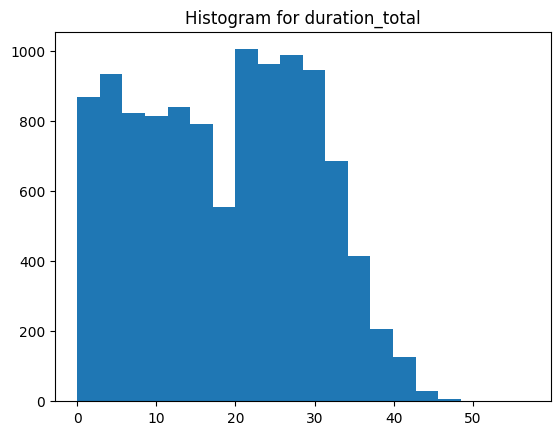

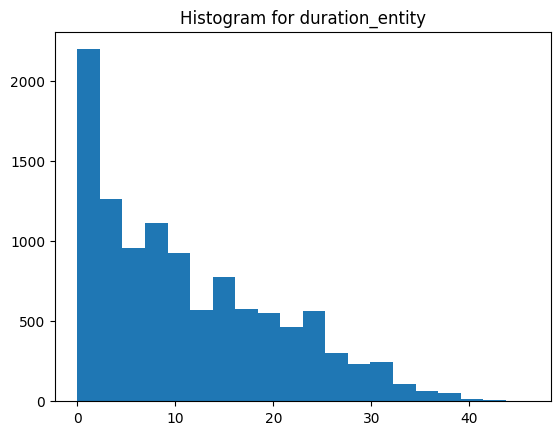

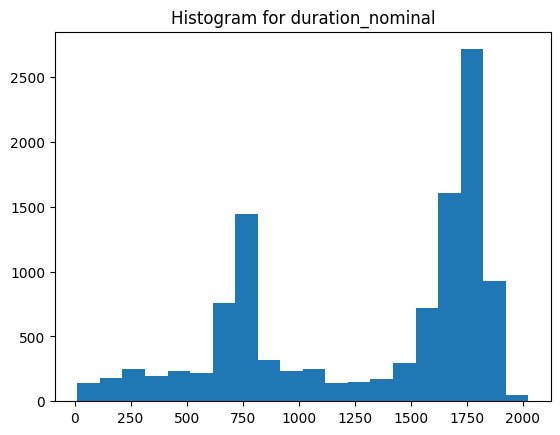

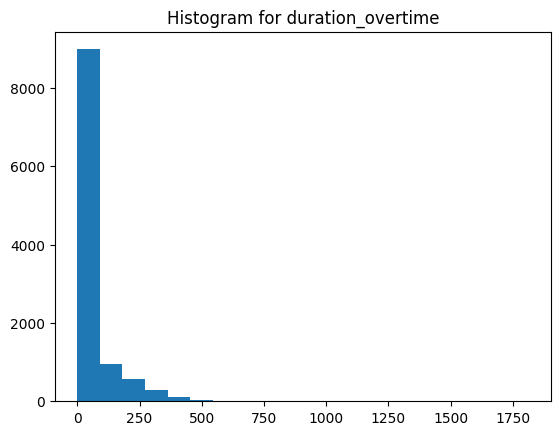

In [8]:
# Histograms for quantitative variables separate plots
for var in quant_vars:
    plt.hist(data[var], bins=20)
    plt.title(f"Histogram for {var}")
    plt.show()

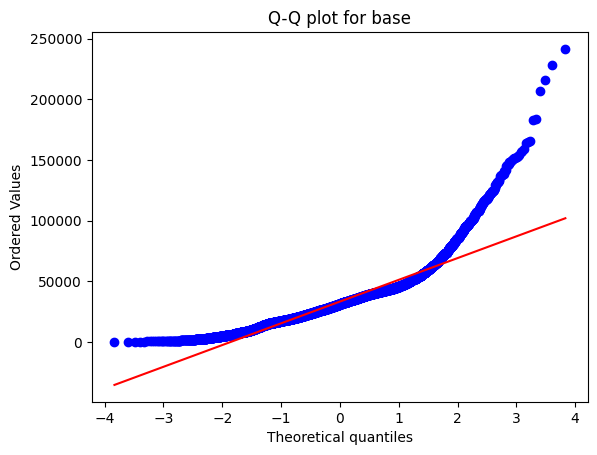

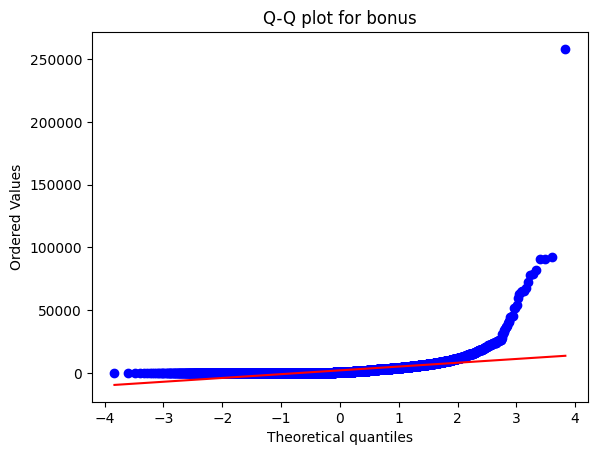

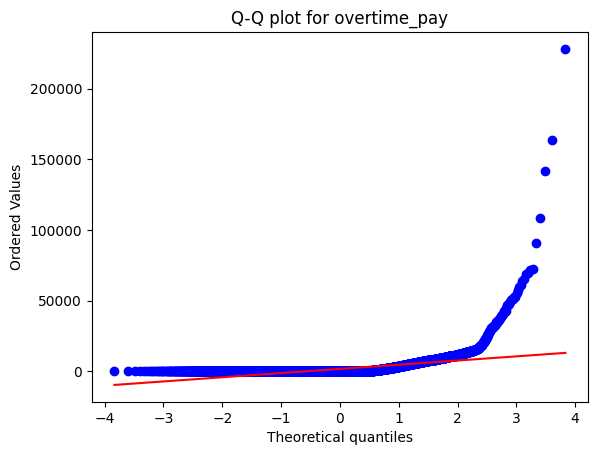

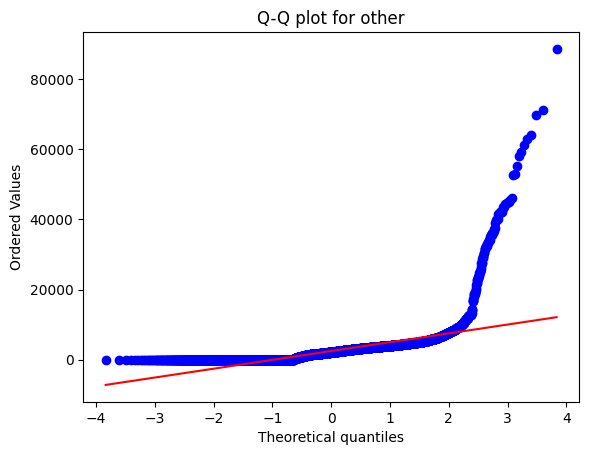

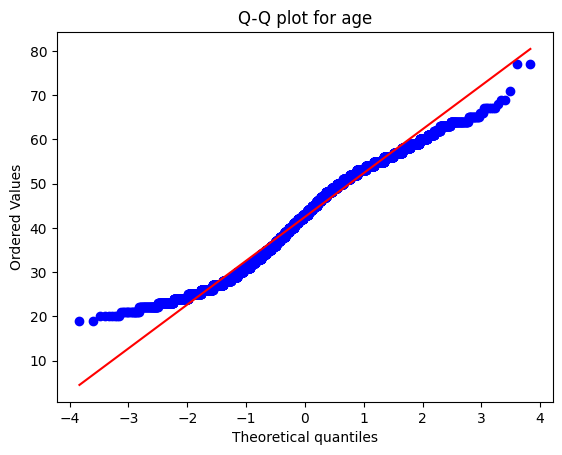

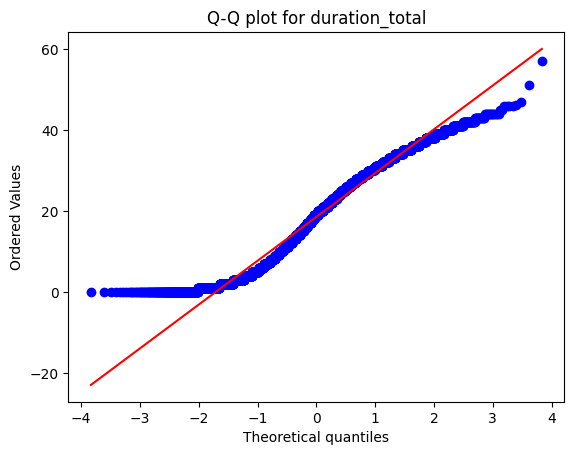

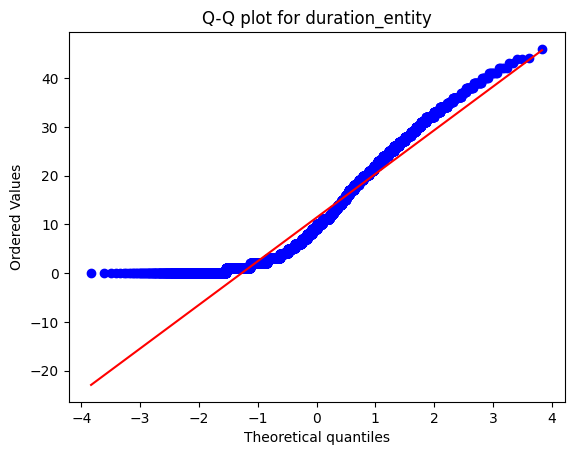

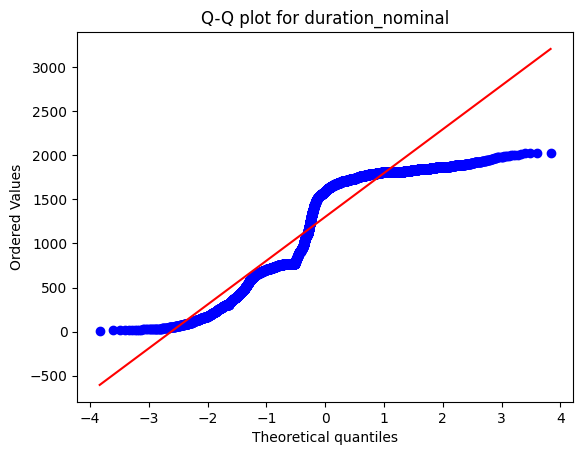

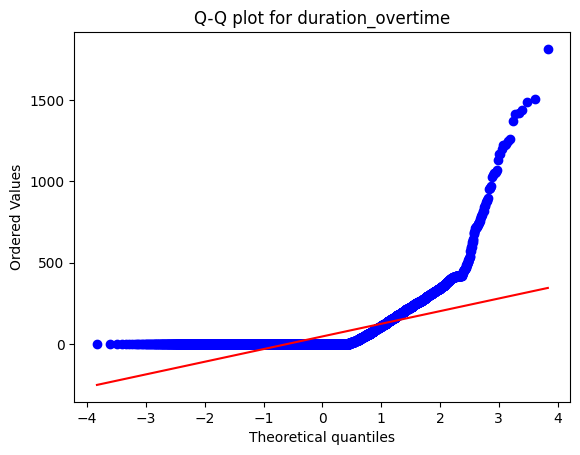

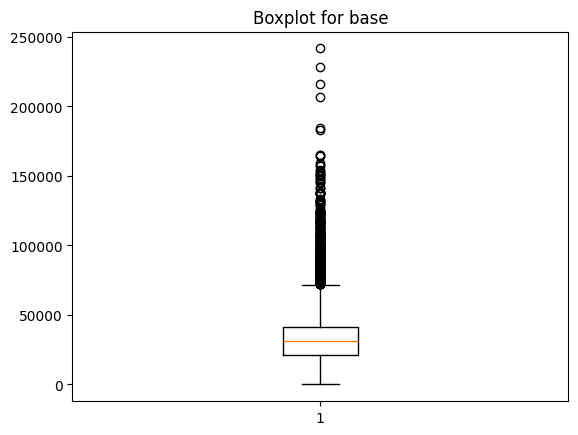

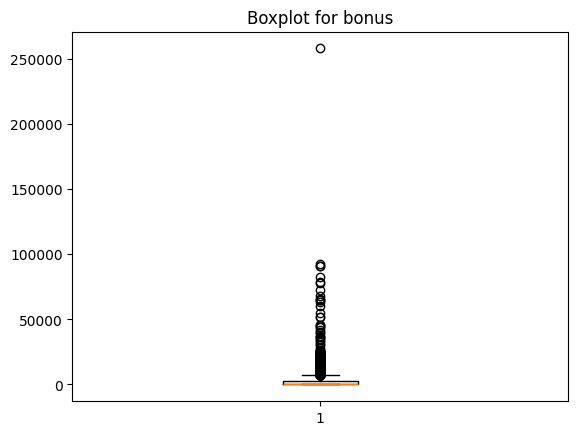

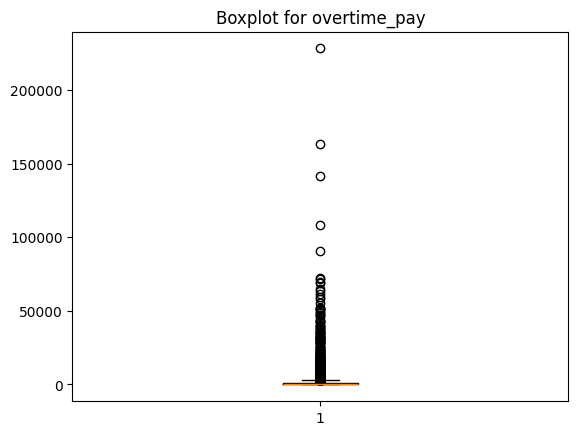

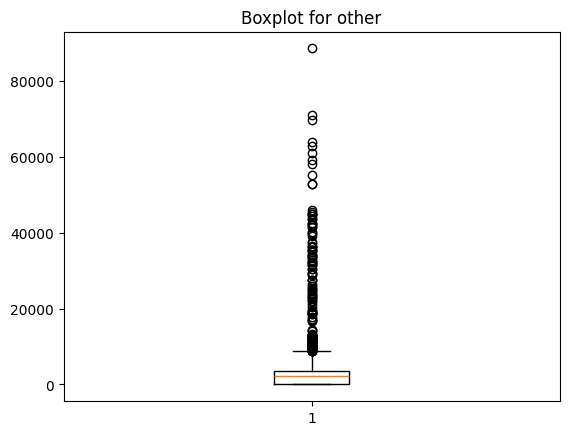

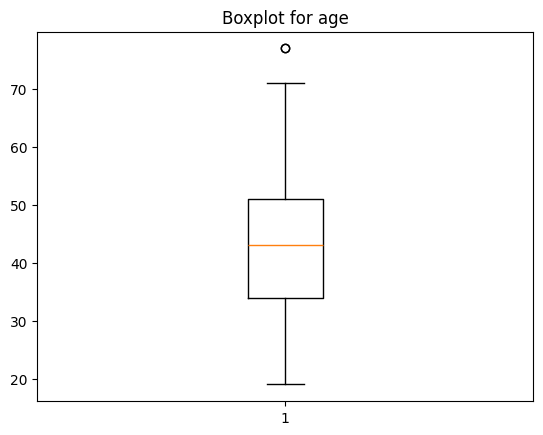

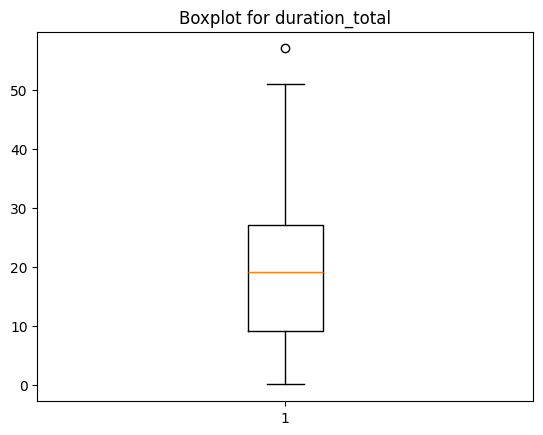

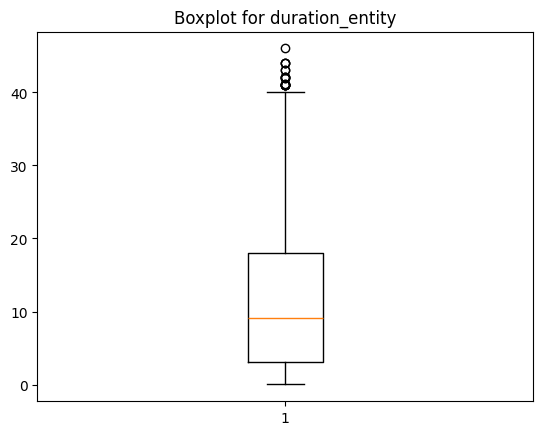

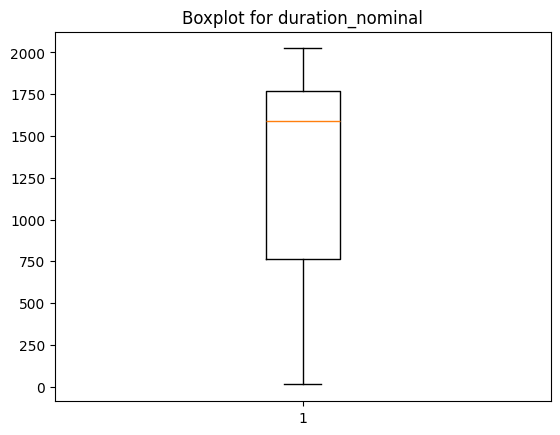

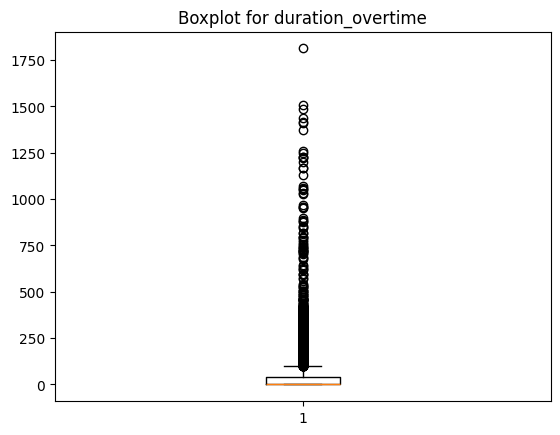

In [9]:
# Q-Q plots for quantitative variables
for var in quant_vars:
    stats.probplot(data[var], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {var}")
    plt.show()

# Get boxplots for quantitative variables
for var in quant_vars:
    plt.boxplot(data[var])
    plt.title(f"Boxplot for {var}")
    plt.show()

plt.close()

In [10]:
# HTML report using ydata_profiling for Subtask 1 and Subtask 2.
from ydata_profiling import ProfileReport

# "auto" correlations calculates the column pairwise correlation depending on the type schema:
# numerical to numerical variable: Spearman correlation coefficient
# categorical to categorical variable: Cramer’s V association coefficient
# numerical to categorical: Cramer’s V association coefficient with the numerical variable discretized automatically

# Generate the profile report
profile = ProfileReport(data,
  title = "Earnings Profiling Report",
  correlations = {
    "pearson": {"calculate": True},
    "spearman": {"calculate": True},
    "kendall": {"calculate": True},
    "cramers": {"calculate": True},
    "phi_k": {"calculate": True},
  },
)

# Save the report to an HTML file
profile.to_file("earnings-report.html")

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 23.61it/s]


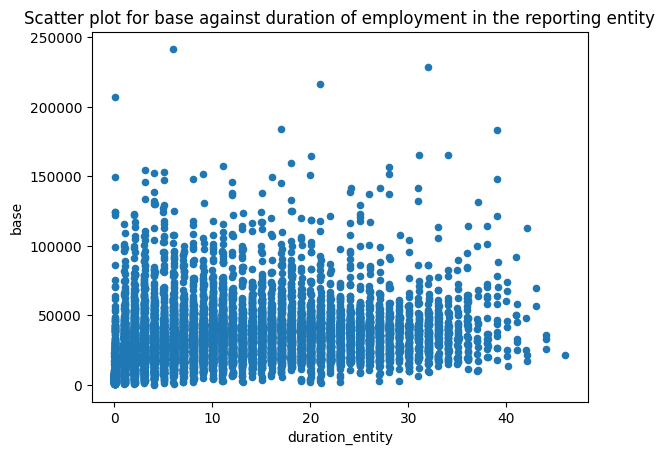

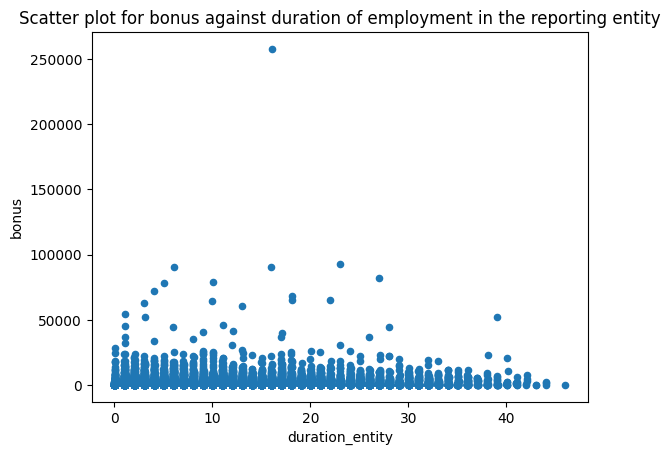

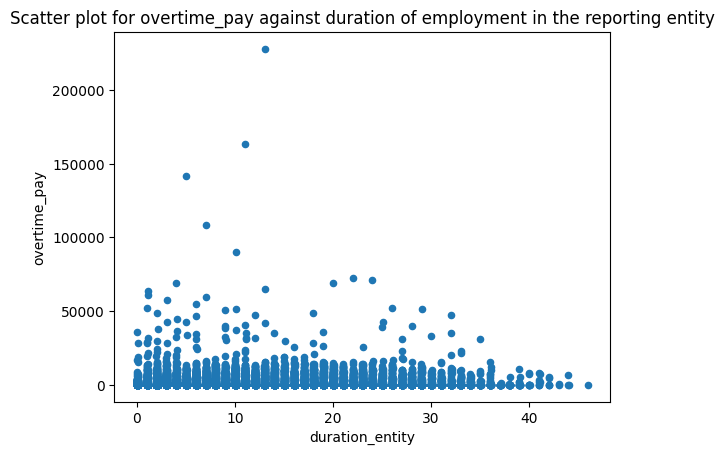

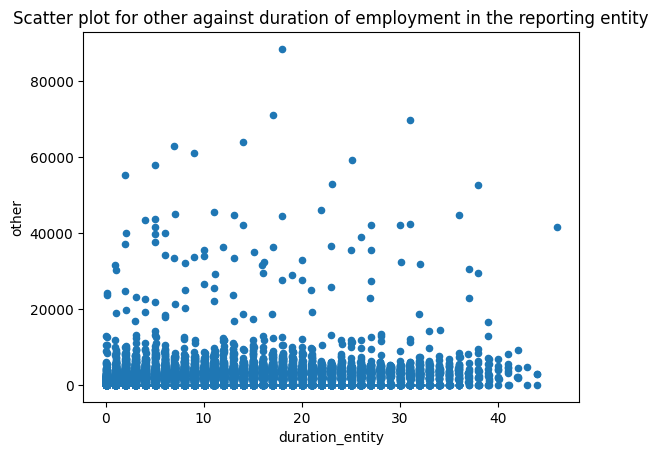

In [11]:
# Subtask 3
salary_related_vars = ['base', 'bonus', 'overtime_pay', 'other']

# Scatter plots for the variables related to the salary structure against the duration of employment in the reporting entity
for salary_related_var in salary_related_vars:
    data.plot.scatter(x='duration_entity', y=salary_related_var)
    plt.title(f"Scatter plot for {salary_related_var} against duration of employment in the reporting entity")
    plt.show()
    plt.close()

Base Salary vs. Duration of Employment:

As duration increases, base salary shows a wide range, particularly after 10 years of employment.
There is a notable concentration of employees with shorter durations and lower base salaries.
There are outliers with very high base salaries across various durations of employment, suggesting that factors beyond duration may significantly influence base salary.

Bonus vs. Duration of Employment:

Bonuses are more commonly given to employees with less than approximately 20 years of duration, with a few exceptions.
There is a slight trend indicating that bonuses may increase with duration, but this is not consistent across all data points.
High bonuses are less frequent, with a few significant outliers.

Other Compensation vs. Duration of Employment:

"Other" compensation is less than base salary and bonuses but follows a similar pattern, with a more significant spread as duration increases.
There is no clear trend linking the duration of employment with "other" compensation amounts.
A few outliers receive substantially higher "other" compensation, independent of their duration of employment.

Overtime Pay vs. Duration of Employment:

Overtime pay is mostly lower than base salary and bonuses and does not show a clear increase with longer employment duration.
The majority of data points for overtime pay are clustered at lower amounts, regardless of employment duration.
There are outliers with high overtime pay, but these are not clearly linked to the duration of employment.


Across all plots, while there is some indication that longer employment could be associated with higher compensation, the relationship does not appear to be strong, and there is significant variability. This suggests that while duration of employment may be one factor in determining compensation, it is not the only one, and individual circumstances likely play a substantial role. Each type of compensation has its own pattern of distribution and outliers, which could be influenced by job role, performance, department, or other specific policies and practices of the reporting entity.

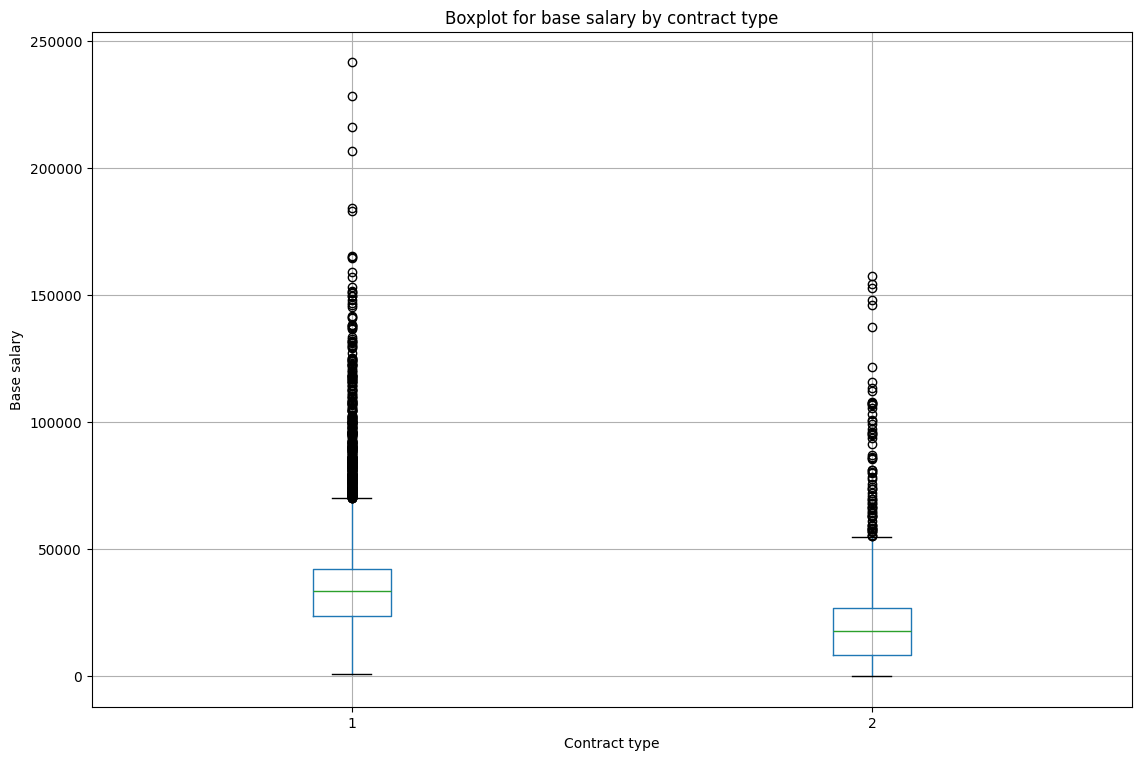

In [12]:
# A boxplot for a quantitative variable of choice in division by the type of employment
# contract of the respondents
fig, ax = plt.subplots(figsize=(13,9))
data.boxplot(column='base', by='contract', ax=ax)
plt.suptitle("")
plt.title("Boxplot for base salary by contract type")
plt.ylabel("Base salary")
plt.xlabel("Contract type")
plt.show()
plt.close()

The provided image is a boxplot that displays the distribution of base salaries by contract type, with salaries given in Polish Zloty (PLN). Here's how to interpret the elements of the boxplot:

The x-axis has two categories, labeled '1' and '2', which represent two different types of contracts.
The y-axis shows the base salary amounts ranging from 0 to 250,000 PLN.
Each box represents the interquartile range (IQR) for the base salaries within that contract type:
The bottom of the box indicates the first quartile (Q1), which is the 25th percentile of the data.
The top of the box indicates the third quartile (Q3), which is the 75th percentile.
The line within the box indicates the median salary, which is the 50th percentile.
The "whiskers" extending from the boxes show the range of the data excluding outliers. The ends of the whiskers represent the lowest and highest salaries within 1.5 times the IQR from the first and third quartiles, respectively.
The individual dots outside the whiskers are outliers, indicating salaries that are unusually low or high compared to the rest of the data within that contract type.
From the plot, we can see that:

Contract type '1':

The median salary (the line within the box) is positioned above the median of contract type '2', indicating a higher median salary for contract type '1'.
The IQR (the box itself) for contract type '1' is narrower than that of contract type '2', suggesting there is less variability in the salaries of contract type '1' in the IQR range.
There are many outliers for contract type '1', indicating several salaries that are much higher than the main cluster of the data.

Contract type '2':

The median salary for contract type '2' is lower than that of contract type '1'.
The IQR is wider, indicating more variability in the salaries for contract type '2' in the IQR range.
There are fewer outliers compared to contract type '1', and they do not extend as high as those for contract type '1'.

A heatmap of the (appropriate!) correlation coefficients among the quantitative variables in the dataset can be found in the earnings-report.html. You can find some comments on the correlation of the variables in the Alerts subsection of Overview.

"auto" correlations calculates the column pairwise correlation depending on the type schema:
numerical to numerical variable: Spearman correlation coefficient
categorical to categorical variable: Cramer’s V association coefficient
numerical to categorical: Cramer’s V association coefficient with the numerical variable discretized automatically


# Subtask 4
Compute the confidence intervals at the confidence level 1 − α = 0.99 for the age of the employees for the following parameters.

For the confidence intervals of mean, var and median we need to assume that the age variable comes from a normal distribution. Looking at the qqplot it looks like a reasonable assumption. Additionally, we can perform a Shapiro-Wilk test to check if it's plausible to say that the age variable comes from a normal distribution.

In [13]:
# Shaprio-Wilk test
alpha = 0.05
# choose a random subsample of n observations (the p value calculation is accurate for n < 5000)
n = 2000
shapiro_test = stats.shapiro(data['age'].sample(n=n))

print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}.")
print(f"Shapiro-Wilk test p-value: {shapiro_test[1]}.")
if shapiro_test[1] < alpha:
    print("Since the p-value is lower than the significance level, we reject the null hypothesis that the age variable comes from a normal distribution.")
else:
    print("Since the p-value is greater than the significance level, we cannot reject the null hypothesis that the age variable comes from a normal distribution.")

Shapiro-Wilk test statistic: 0.9784557819366455.
Shapiro-Wilk test p-value: 8.358463551734802e-17.
Since the p-value is lower than the significance level, we reject the null hypothesis that the age variable comes from a normal distribution.


The p-value is lower than the significance level, we reject the null hypothesis that the age variable comes from a normal distribution. However, the qqplot looks like a normal distribution, so we will assume that the age variable comes from a normal distribution.

In [14]:
# mean std is unknown
mean_est = data['age'].mean()
n = len(data['age'])
std_est = data['age'].std(ddof=0) # ddof=0 because we want a biased estimator of the variance (the std estimator will be biased anyway)
alpha = 0.01
t = stats.t.ppf(1 - alpha / 2, n - 1)
ci_mean_unknown_std = (mean_est - t * std_est / np.sqrt(n - 1), mean_est + t * std_est / np.sqrt(n - 1))
print(f"Confidence interval for the mean of age is: {ci_mean_unknown_std}.")

Confidence interval for the mean of age is: (42.22424529423357, 42.71611834213007).


In [15]:
# var, mean is unknown
n = len(data['age'])
var_est = data['age'].var(ddof=0) # ddof=0 because we want a biased estimator of the variance
alpha = 0.01
chi2_lower = stats.chi2.ppf(alpha / 2, n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, n - 1)
ci_var_unknown_mean = (n * var_est / chi2_upper, n * var_est / chi2_lower)
print(f"Confidence interval for the variance of age is: {ci_var_unknown_mean}.")

Confidence interval for the variance of age is: (96.84602609043314, 103.81334720276196).


In [16]:
# median
alpha = 0.01
n = len(data['age'])
median_est = data['age'].median()
z = stats.norm.ppf(1 - alpha / 2)
ci_median = (median_est - z * np.sqrt(np.pi / 2 / n), median_est + z * np.sqrt(np.pi / 2 / n))
print(f"Confidence interval for the median of age is: {ci_median}.")

Confidence interval for the median of age is: (42.96921914525147, 43.03078085474853).


In [17]:
# median, bootstrap without assuming normality
alpha = 0.01
n_samples = len(data['age']) // 2
n_bootstrap = 3000
medians = np.zeros(n_bootstrap)
for i in range(n_bootstrap):
    medians[i] = data['age'].sample(n=n_samples, replace=True).median()
ci_median_bootstrap = (np.quantile(medians, alpha / 2), np.quantile(medians, 1 - alpha / 2))
print(f"Confidence interval for the median of age is: {ci_median_bootstrap}.")

Confidence interval for the median of age is: (42.0, 43.0).


# Subtask 5
(a) Independent Samples T-Test: This is the most common test for comparing the means of two independent groups (in this case, public vs. private sector employees). It assumes that the data is normally distributed and that the variances of the two groups are equal. If the assumption of equal variances is violated, we can use a variation of the t-test known as Welch's t-test. The null hypothesis is that the two groups have equal means, and the alternative hypothesis is that the means are not equal. The test statistic is the t-statistic, which is calculated as the difference between the two sample means divided by the standard error of the difference between the means. The p-value is calculated from the t-statistic and the degrees of freedom (which is the sum of the sample sizes minus 2). If the p-value is less than the significance level, we reject the null hypothesis and conclude that the means are not equal.

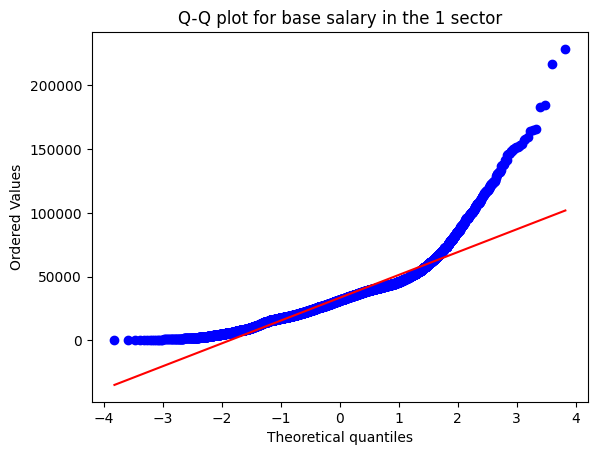

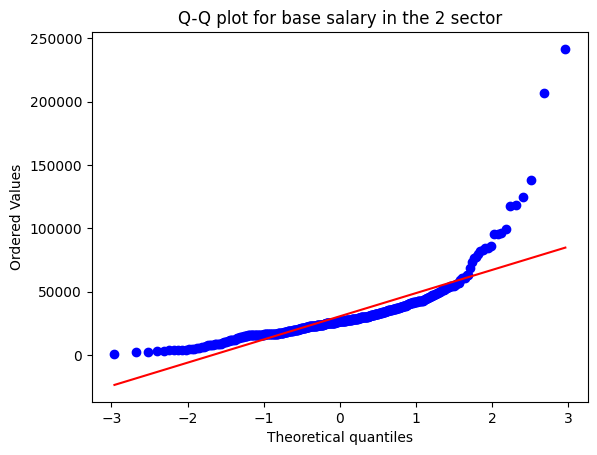

In [18]:
# qqplot for base salary grouped by the sector
sectors = data['sector'].unique()
for sector in sectors:
    stats.probplot(data[data['sector'] == sector]['base'], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for base salary in the {sector} sector")
    plt.show()
    plt.close()

The qqplots for the base salary grouped by the sector show that the data does not look to be normally distributed. We will use the Mann-Whitney U test to compare the base salaries of the public and private sector employees. The Mann-Whitney U test is a non-parametric test that does not assume normality. The null hypothesis is that the two groups have equal medians, and the alternative hypothesis is that the medians are not equal. The test statistic is the Mann-Whitney U statistic, which is calculated as the sum of the ranks of the observations in the first group. The p-value is calculated from the U statistic and the sample sizes. If the p-value is less than the significance level, we reject the null hypothesis and conclude that the medians are not equal.

In [19]:
sectors_dict = {'public': 1, 'private': 2}
alpha = 0.01
mann_test = stats.mannwhitneyu(data[data['sector'] == sectors_dict['public']]['base'],
                               data[data['sector'] == sectors_dict['private']]['base'])
print(f"Mann-Whitney U test statistic: {mann_test[0]}.")
print(f"Mann-Whitney U test p-value: {mann_test[1]}.")
if mann_test[1] < alpha:
    print("Since the p-value is lower than the significance level, we reject the null hypothesis that the medians of the base salaries of public and private sector employees are equal.")
else:
    print("Since the p-value is greater than the significance level, we cannot reject the null hypothesis that the medians of the base salaries of public and private sector employees are equal.")

Mann-Whitney U test statistic: 2766326.0.
Mann-Whitney U test p-value: 7.238146961753935e-09.
Since the p-value is lower than the significance level, we reject the null hypothesis that the medians of the base salaries of public and private sector employees are equal.


(b) Let's look at the qqplots.

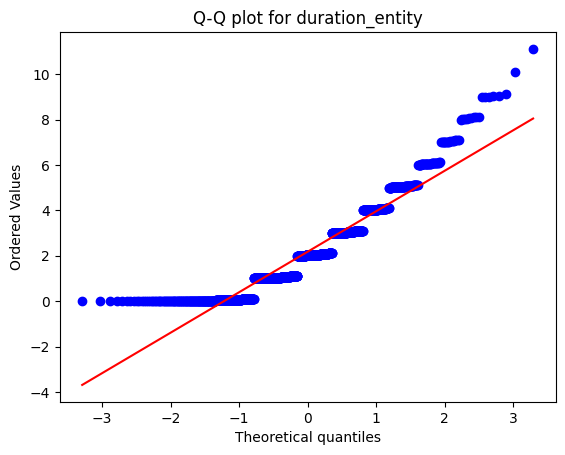

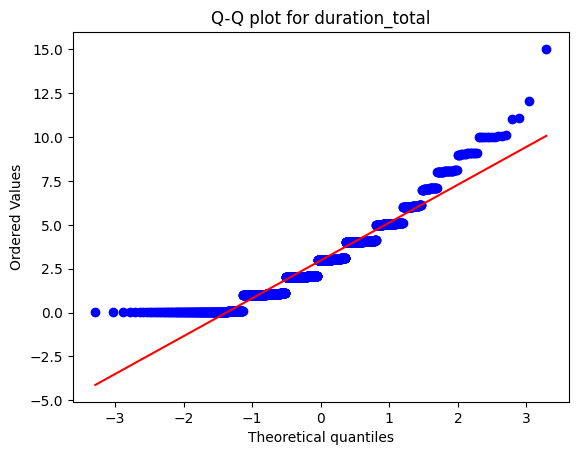

In [20]:
variables = ['duration_entity', 'duration_total']
for variable in variables:
    stats.probplot(data[data['age'] < 30][variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {variable}")
    plt.show()
    plt.close()

In [21]:
# Let's assume normality (qqplots suggest that the underlying distribution could be normal) and apply the independent samples t-test to compare the duration of employment in the reporting entity and the total duration of employment for employees under 30 years old.
alpha = 0.01
t_test = stats.ttest_ind(data[data['age'] < 30]['duration_total'], data[data['age'] < 30]['duration_entity'], equal_var=False)
print(f"Independent samples t-test statistic: {t_test[0]}.")
print(f"Independent samples t-test p-value: {t_test[1]}.")
if t_test[1] < alpha:
    print("Since the p-value is lower than the significance level, we reject the null hypothesis that the means of the duration of employment in the reporting entity and the total duration of employment for employees under 30 years old are equal.")
else:
    print("Since the p-value is greater than the significance level, we cannot reject the null hypothesis that the means of the duration of employment in the reporting entity and the total duration of employment for employees under 30 years old are equal.")

Independent samples t-test statistic: 10.094910973993615.
Independent samples t-test p-value: 1.5309703499872536e-23.
Since the p-value is lower than the significance level, we reject the null hypothesis that the means of the duration of employment in the reporting entity and the total duration of employment for employees under 30 years old are equal.


(c) The following scatter plot suggests that there is a significant downtrend. Let's use linear regression to check that.

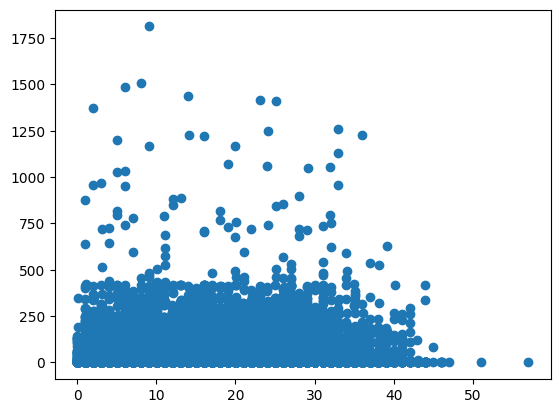

In [22]:
plt.scatter(data['duration_total'], data['duration_overtime'])

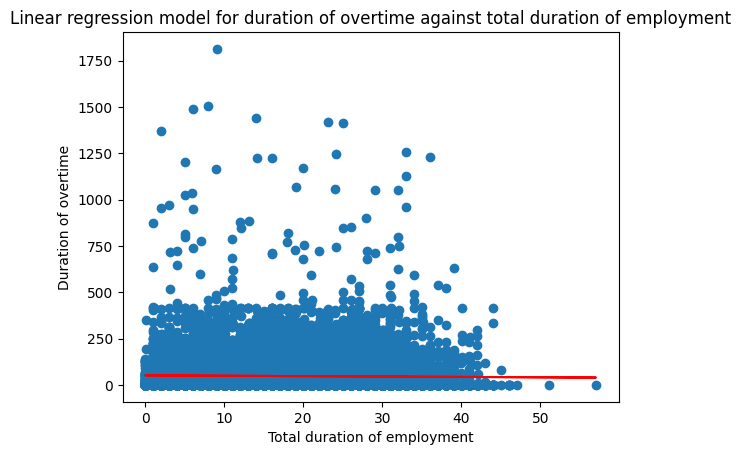

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.697
Date:                Wed, 03 Jan 2024   Prob (F-statistic):             0.0302
Time:                        08:03:40   Log-Likelihood:                -67505.
No. Observations:               11000   AIC:                         1.350e+05
Df Residuals:                   10998   BIC:                         1.350e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.6081      2.095     24.639      0.0

In [23]:
import statsmodels.api as sm

X = data['duration_total'].values.reshape(-1, 1)
y = data['duration_overtime'].values.reshape(-1, 1)

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()

# plot the predictions against the actual values
y_pred = model.predict(X_sm)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title("Linear regression model for duration of overtime against total duration of employment")
plt.xlabel("Total duration of employment")
plt.ylabel("Duration of overtime")
plt.show()
plt.close()

print(model.summary())

In [24]:
# Let's get the confidence interval for the slope coefficient with alpha = 0.01
alpha = 0.01
print(model.conf_int(alpha=alpha)[1])

[-0.46042092  0.03970403]


In [25]:
# Let's get the confidence interval for the slope coefficient with alpha = 0.05
alpha = 0.05
print(model.conf_int(alpha=alpha)[1])

[-0.4006204  -0.02009649]


With significance level of 0.01 we get a confidence interval having both negative and positive values but with significance level of 0.05 we get a confidence interval having only negative values.

Instead of OLS we can use the Spearman correlation coefficient to measure the strength of the monotonic relationship between the two variables. With Spearman we don't need to assume normality.


In [26]:
# Spearman correlation coefficient
alpha = 0.01
spearman_test = stats.spearmanr(data['duration_total'], data['duration_overtime'])
print(f"Spearman correlation coefficient: {spearman_test[0]}.")
print(f"Spearman correlation coefficient p-value: {spearman_test[1]}.")
if spearman_test[1] < alpha:
    print("Since the p-value is lower than the significance level, we reject the null hypothesis that there is no monotonic relationship between the duration of overtime and the total duration of employment.")
else:
    print("Since the p-value is greater than the significance level, we cannot reject the null hypothesis that there is no monotonic relationship between the duration of overtime and the total duration of employment.")

Spearman correlation coefficient: -0.04541387713135982.
Spearman correlation coefficient p-value: 1.888867423023844e-06.
Since the p-value is lower than the significance level, we reject the null hypothesis that there is no monotonic relationship between the duration of overtime and the total duration of employment.


# Subtask 6

# Subtask 7

7 (a)

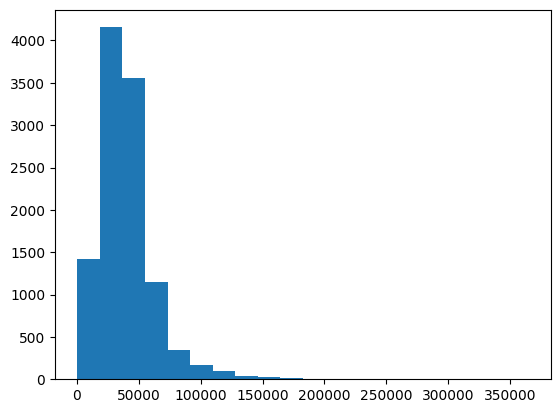

In [28]:
data['total_salary'] = data['base'] + data['bonus'] + data['overtime_pay'] + data['other']

plt.hist(data['total_salary'], bins=20)
plt.show()
plt.close()

7 (b) Preliminary linear regression model.

In [31]:
# regressors are all the variables except for the salary related and id
salary_related_vars = ['base', 'bonus', 'overtime_pay', 'other', 'total_salary']
regressors = data.columns.values[~data.columns.isin(salary_related_vars + ['id'])]
X = data[regressors]
X = sm.add_constant(X)
model = sm.OLS(data['total_salary'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_salary   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1093.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:09:52   Log-Likelihood:            -1.2274e+05
No. Observations:               11000   AIC:                         2.455e+05
Df Residuals:                   10989   BIC:                         2.456e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.857e+04   1709.53

R^2 is 0.499, which means that the model explains 49.9% of the variance in the dependent variable.
Assuming significance level of 0.01 only the sector variable is insignificant.
Looking at the F-statistic and the p-value we can see that the model is jointly significant.

Checking the OLS assumptions.
Let's check linearity.

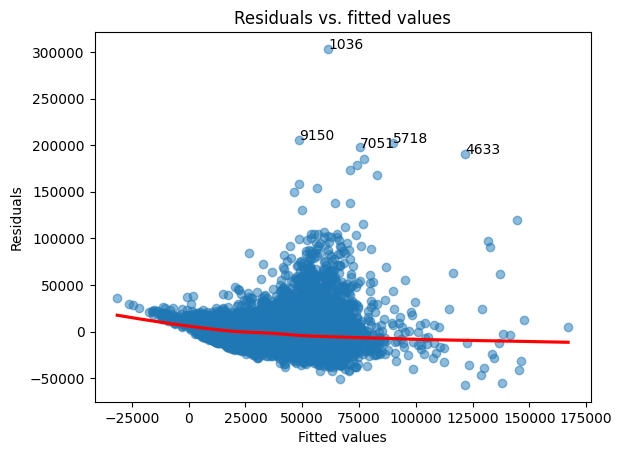

In [44]:
import seaborn as sns

# Create the scatter plot
fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals, alpha=0.5)

# Add a lowess line (smoothed line using locally weighted regression):
sns.regplot(x=fitted_values, y=residuals, lowess=True, scatter=False, ax=plt.gca(), color='red')

# Identifying and labeling outliers:
number_of_outliers = 5
largest_residuals = np.abs(residuals).nlargest(number_of_outliers)
indices_of_outliers = largest_residuals.index
for index in indices_of_outliers:
    plt.annotate(index, (fitted_values[index], residuals[index]))

plt.title("Residuals vs. fitted values")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()
plt.close()

Linearity looks almost OK.
Heteroskedasticity is not OK as we can see a cone shaped pattern.
Let's check the distribution of random disturbance.

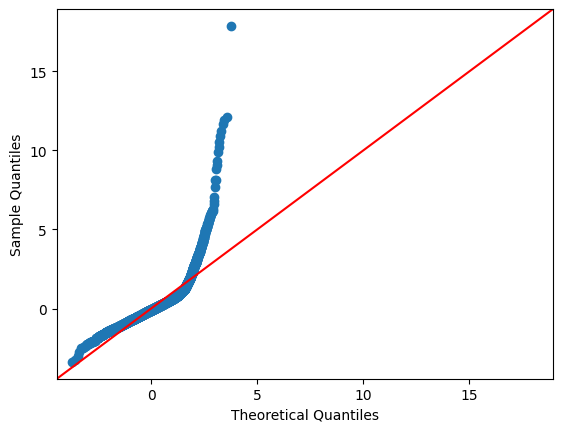

In [52]:
# Generate a Q-Q plot
fig = sm.qqplot(residuals, line='45', fit=True)  # '45' refers to the 45-degree comparison line

# Label the outliers on the Q-Q plot:
# (for this, we need to compute the theoretical quantiles and the sorted residuals)
qq_line = sm.ProbPlot(residuals)
theoretical_quantiles = qq_line.theoretical_quantiles
sorted_residuals = qq_line.sample_quantiles

plt.show()

Random disturbance NOT OK.
Let's check for autocorrelation.

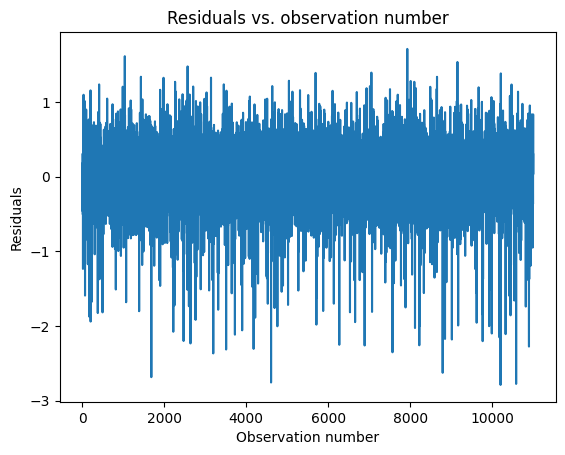

In [233]:
plt.plot(residuals)
plt.title("Residuals vs. observation number")
plt.xlabel("Observation number")
plt.ylabel("Residuals")
plt.show()
plt.close()

No autocorrelation, OK.

7 (c) Improving the baseline model.

In [235]:
# Let's add one hot encoding for the categorical variables.
cat_vars = ['sector', 'section_07', 'sex', 'education', 'contract']
X = data[regressors]
X = pd.get_dummies(X, columns=cat_vars, drop_first=True, dtype=np.int64)
X = sm.add_constant(X)
model = sm.OLS(data['total_salary'], X).fit()
print(model.summary())

# We can see some improvements, let's drop the sector_2 variable as it's insignificant.

                            OLS Regression Results                            
Dep. Variable:           total_salary   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     775.1
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:55:40   Log-Likelihood:            -1.2257e+05
No. Observations:               11000   AIC:                         2.452e+05
Df Residuals:                   10984   BIC:                         2.453e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.759e+04   1694.65

In [236]:
X = X.drop(columns=['sector_2'])
model = sm.OLS(data['total_salary'], X).fit()
print(model.summary())

# Now, the model is jointly more significant.

                            OLS Regression Results                            
Dep. Variable:           total_salary   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     830.3
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:55:44   Log-Likelihood:            -1.2257e+05
No. Observations:               11000   AIC:                         2.452e+05
Df Residuals:                   10985   BIC:                         2.453e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.765e+04   1694.07

In [81]:
%pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 38.9 MB/s eta 0:00:00


In [237]:
# Let's normalize the quantitative variables.
from sklearn.preprocessing import StandardScaler

qual_vars = ['id', 'sector', 'section_07', 'sex', 'education', 'contract']
quant_vars = data.columns.values[~data.columns.isin(qual_vars + salary_related_vars)]
X[quant_vars] = StandardScaler().fit_transform(X[quant_vars])
y = data['total_salary']
model = sm.OLS(y, X).fit()
print(model_with_scaling.summary())

# There aren't any significant changes, so we don't need to scale the variables but it
# might be useful for feature engineering.

                            OLS Regression Results                            
Dep. Variable:           total_salary   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     830.3
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:55:47   Log-Likelihood:            -1.2257e+05
No. Observations:               11000   AIC:                         2.452e+05
Df Residuals:                   10985   BIC:                         2.453e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.292e+04    969.84

In [238]:
# Let's try some feature engineering.
X['age_*_duration_nominal'] = X['age'] * X['duration_nominal']
X['age_square_root'] = (X['age'] * X['age']) ** (1 / 4)
X['sex_*_duration_nominal'] = X['sex_2'] * X['duration_nominal']
X['duration_overtime_squared'] = X['duration_overtime'] ** 2
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_salary   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     687.0
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:55:51   Log-Likelihood:            -1.2239e+05
No. Observations:               11000   AIC:                         2.448e+05
Df Residuals:                   10981   BIC:                         2.450e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [239]:
# let's transform the target variable
y_log = np.log(y)
model = sm.OLS(y_log, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_salary   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     1024.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:55:53   Log-Likelihood:                -5814.3
No. Observations:               11000   AIC:                         1.167e+04
Df Residuals:                   10981   BIC:                         1.181e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [240]:
# Getting rid of outliers
number_of_outliers = 100
indices_of_outliers = np.abs(model.resid).nlargest(number_of_outliers).index
X = X.drop(index=indices_of_outliers)
y_log = y_log.drop(index=indices_of_outliers)

In [241]:
# without outliers

model = sm.OLS(y_log, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_salary   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1114.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:55:58   Log-Likelihood:                -4373.4
No. Observations:               10900   AIC:                             8785.
Df Residuals:                   10881   BIC:                             8923.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

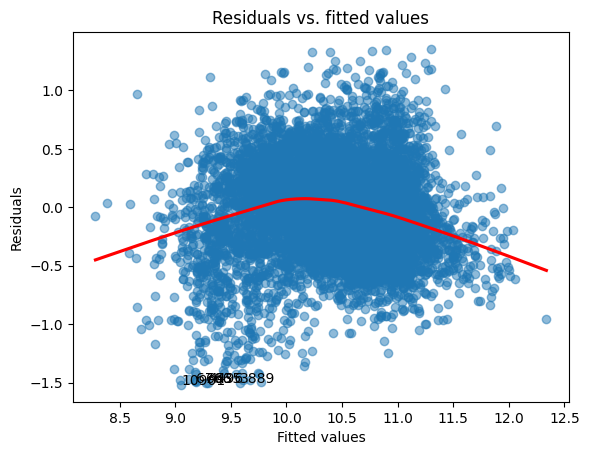

In [242]:
# Create the scatter plot
fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals, alpha=0.5)

# Add a lowess line (smoothed line using locally weighted regression):
sns.regplot(x=fitted_values, y=residuals, lowess=True, scatter=False, ax=plt.gca(), color='red')

# Identifying and labeling outliers:
number_of_outliers = 5
largest_residuals = np.abs(residuals).nlargest(number_of_outliers)
indices_of_outliers = largest_residuals.index
for index in indices_of_outliers:
    plt.annotate(index, (fitted_values[index], residuals[index]))

plt.title("Residuals vs. fitted values")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()
plt.close()

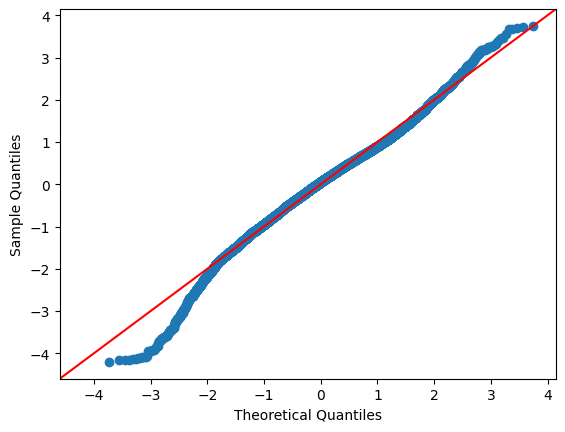

In [243]:
# Generate a Q-Q plot
fig = sm.qqplot(residuals, line='45', fit=True)  # '45' refers to the 45-degree comparison line

# Label the outliers on the Q-Q plot:
# (for this, we need to compute the theoretical quantiles and the sorted residuals)
qq_line = sm.ProbPlot(residuals)
theoretical_quantiles = qq_line.theoretical_quantiles
sorted_residuals = qq_line.sample_quantiles

plt.show()

Mostly thanks to transforming the target variable and getting rid of some outliers we were able to obtain homoscedasticity and obtain a good looking random disturbance. There is still no autocorrelation (and even if there was we could simply permute the observations). Unfortunately - looking at the residuals vs. fitted values - the linearity is not OK. With feature engineering, one hot encoding and transforming the target variable we were able to improve R^2 by almost 0.15 (the model is explaining a lot more variation now). This very well could be overfitting as there was no standard data split.

7 (d)

In [ ]:
print(model.summary())

All the variables included in the "best" model are statistically significant.
The coefficients are based on the log-transformed dependent variable, so the interpretation is in terms of percentage change rather than absolute change.

age: The coefficient of 0.0546 suggests that, holding all other variables constant, a one-unit increase in age is associated with an average increase of 0.0546 units in the dependent variable. This effect is statistically significant (p-value < 0.000).

duration_total: A coefficient of 0.0757 implies that for every additional unit in total duration, there is an average increase of 0.0757 units in the dependent variable. The effect is significant (p-value < 0.000).

duration_entity: With a coefficient of 0.0540, an increase in the duration at the entity is associated with an increase in the dependent variable. The effect is significant (p-value < 0.000).

duration_nominal: This has a relatively large positive coefficient of 0.4063, indicating a strong positive relationship with the dependent variable. It's highly significant (p-value < 0.000).

duration_overtime: The coefficient of 0.2793 suggests a positive relationship with the dependent variable. This effect is also statistically significant (p-value < 0.000).

section_07_2, section_07_3: These coefficients are negative, suggesting that being in these sections is associated with a decrease in the dependent variable compared to the baseline section. The effects are significant.

sex_2: This negative coefficient (-0.0365) implies that the group represented by sex_2 (women) has a lower average in the dependent variable compared to the baseline group (males). The effect is significant.

education_2, education_3, education_4, education_5, education_6: All these coefficients are negative and significant, suggesting that lower education levels (1 represents the highest education level) are associated with lower values of the dependent variable compared to the baseline education level.
There is a decreasing trend in the coefficients as the education level decreases. The smallest difference is between education levels 5 and 6 and the largest difference is between education levels 2 and 3 which suggests that the effect of education level on the dependent variable is not linear. 

contract_2: The negative coefficient (-0.2954) indicates a lower value of the dependent variable for contract_2 compared to the baseline contract type, and the effect is significant.

age_*_duration_nominal: This interaction term has a negative coefficient (-0.0141), suggesting that the combined effect of age and duration nominal differs from the effect of each individually (both are positive).

age_square_root: The negative coefficient (-0.1788) suggests a decrease in the dependent variable with an increase in the square root of age.

sex_*_duration_nominal: Another interaction term, its negative coefficient (-0.1097) indicates a combined effect of sex and duration nominal on the dependent variable.

duration_overtime_squared: With a negative coefficient (-0.0211), this suggests a diminishing return effect as the duration of overtime increases.

